# Input to slides
The cell below executes to auxiliary notebooks for updating the plots.

In [ ]:
%run auxiliary_spatial_data.ipynb

# Part 1: Spatial data fundamentals

# Introduction and motivation

## Why spatial data?

- Data supply is exploding
    - Free public big data
        - Infrastructure and buildings
        - Weather, housing market, traffic, job openings
        - Other APIs
        - Check out list at https://freegisdata.rtwilson.com/
    - Private big data
        - Smartphone: GPS sensors/wifi
        - Powerful for pay APIs
- Spatial proximity > social relation?


## Why spatial data? (2)

Let's try some free public data: 
- Where are the restaurants in Denmark? (i.e. where do people live)

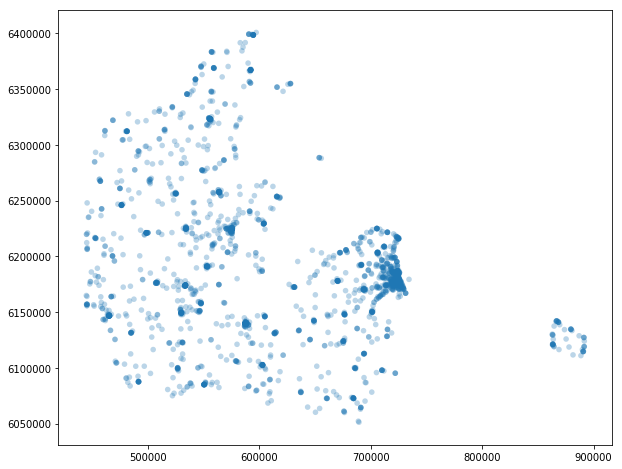

In [2]:
f_restaurant_buffer

## Why spatial data? (3)

- Feature engineering
    - Approximate local measures (interpolation)
    - Intersect behavior and context:
        - Did you visit the supermarket yesterday?
        - Are people who spend more time in greenspace less streesed, less likely to use their phone?
- Identification strategy
    - Spatial RD: use separation administrative boundaries as causal effect
    - Heterogeneous policy responses:

# Measurement for spatial data

..


## How do we measure spatial data? 

We need to define the space we work in. What could this be?

- Observations on earth use different Coordinate References System (CRS).

- Some CRS are local and some are global.
  - 2d vs 3d
  - Metric vs. spherical degrees

<br>

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Equirectangular_projection_SW.jpg/1920px-Equirectangular_projection_SW.jpg' alt="Drawing" style="width: 800px;"/></center>

  

## How do we measure spatial data?  (2)

The standard CRS is:

- The Global Positioning System (GPS)
  - Technically called WGS84
  - Has EPSG code 4326 
      - (EPSG: *European Petroleum Survey Group*, now extinct)
      
- Used on Google Maps, Apple Maps etc.

## How do we measure spatial data?  (3)

Working with Danish spatial data you often encounter:

- The Danish mapping reference 
  - Technically called ETRS89 UTM Zone 32 North
  - Has EPSG code 25832
  - This is used in Danish admin data.
  - Coordinates measured in meters: can use Euclidian distance

# Part 2: Structuring spatial data

# Spatial Data Structures

## Spatial shapes

We have already seen how to employ `shapely` to construct spatial shapes.

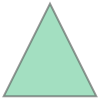

In [12]:
line_coords = np.array([(0,0),(2,0),(1,2)])
Polygon(line_coords)

What if we have more than one spatial object?

We could store spatial objects in lists but that is not smart. Why?

## How do we work with spatial data?

GeoPandas: 
- Collection of spatial objects
    - Powerful data structuring 
    - Static plots
- Combines Pandas with
    - Shapely (Python shape objects)
    - Fiona (low level, ultra fast for complex operations)

Folium
- Interactive plots: map overlay for OpenStreetMaps and zoom

## Loading and storing spatial data

There are two standard formats:
- GeoJSON (.geojson):
    - This is getting more common, especially in more modern applications.
- Shapefiles (.shp)
    - The de-facto standard format. This is a collection of files where the central one is the `.shp` file.
- Other formats

Example - load house price data:

In [40]:
import geopandas as gpd
house_prices = gpd.read_file('house_prices.geojson')

## Loading and storing spatial data (2)

A free API with global data is OpenStreetMaps. 
- contains data on geographic information, e.g. roads, buildings, stores, nature
- loaded in companion notebook

In [42]:
gdf_supermarket.head()

,type,id,lat,lon,tags,geometry,name
0,node,60567984,55.380661,10.396385,"{'brand': 'Meny', 'brand:wikidata': 'Q10581720...",POINT (588473.958 6138039.647),Meny
1,node,243049791,55.749916,12.106998,"{'name': 'Kvickly', 'shop': 'supermarket'}",POINT (694991.107 6182618.342),Kvickly
2,node,249559596,55.370751,10.372971,"{'branch': 'Dalum', 'name': 'Kvickly', 'openin...",POINT (587012.301 6136907.419),Kvickly
3,node,252158674,56.116847,10.154553,"{'name': 'Kvickly Extra', 'shop': 'supermarket'}",POINT (571787.688 6219684.966),Kvickly Extra
4,node,258230314,56.168206,10.161821,"{'brand': 'fakta', 'brand:wikidata': 'Q3172238...",POINT (572143.305 6225408.389),fakta


## GeoDataFrame 

The loaded spatial data is a DataFrame that allows a spatial data columns with certain properties.


In [39]:
house_prices.head()

,buildYear,salesPerio,numberOfRo,paymentCas,residentia,areaWeight,postal,dateRemove,city,lat,lon,price_area,price_ar_1,sale_year,geometry
0,1972,NaN,2,645000.0,49.0,49.0,2620,19-01-2012,Albertslund,55.672423,12.343027,13163.265306,9.485185,2012,POINT (710214.001 6174689.003)
1,1972,NaN,2,575000.0,49.0,49.0,2620,19-07-2012,Albertslund,55.672423,12.343027,11734.693878,9.370305,2012,POINT (710214.001 6174689.003)
2,1968,NaN,4,1695000.0,108.0,131.0,2620,12-03-2012,Albertslund,55.672528,12.356639,12938.931298,9.467996,2012,POINT (711069.001 6174742.003)
3,1968,NaN,4,1995000.0,108.0,131.0,2620,04-07-2012,Albertslund,55.673089,12.359137,15229.007634,9.630957,2012,POINT (711223.001 6174812.003)
4,1968,NaN,4,1795000.0,108.0,131.0,2620,16-08-2012,Albertslund,55.673089,12.359137,13702.290076,9.525318,2012,POINT (711223.001 6174812.003)


## GeoDataFrame (2)

In [35]:
file_path = gpd.datasets.get_path('naturalearth_lowres')
world_countries = gpd.read_file(file_path)
world_countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## GeoSeries

We can select the column for geometry in the the `GeoDataFrame`.

- This column is a smart container for spatial data is the GeoSeries:
    - 1d array with labels (like Pandas series) 
    - useful spatial tools

In [65]:
world_countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

# Map making

## Static plots

Let's try to plot the world's countries. Easy as hell with GeoPandas:

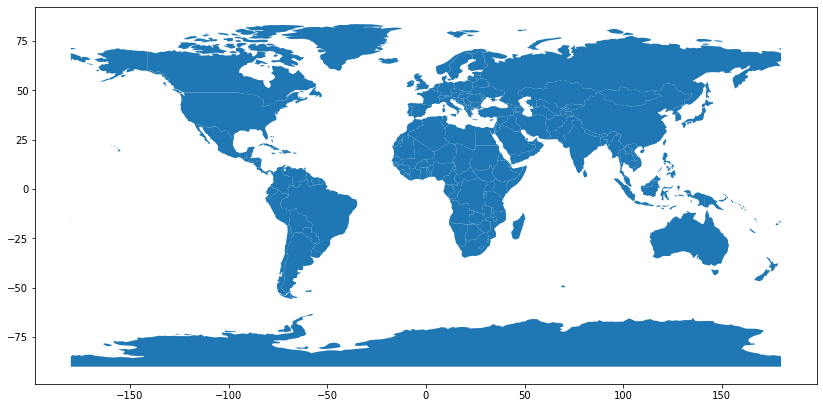

In [68]:
world_countries.plot(figsize=(14,7))

## Static plots (2)

Now let's try to plot the share of young around in the Capital Region of Denmark (excluding Bornholm).

Data is from Statistics Denmark at Parish level.

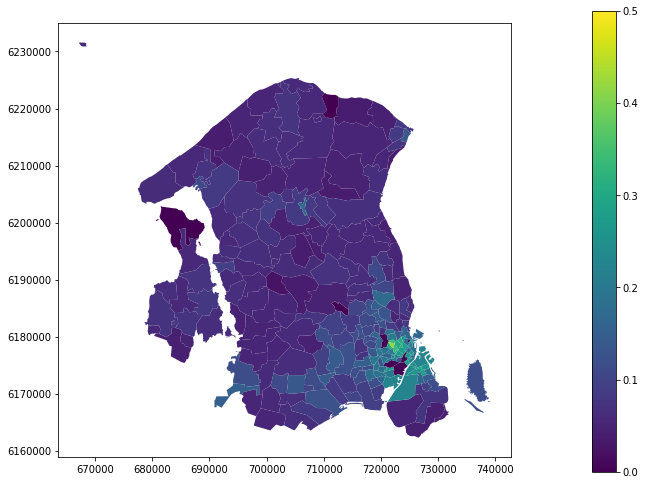

In [10]:
f_cph_young_share

## Static plots (3)

Using municipal level statistics we see much smaller variation.

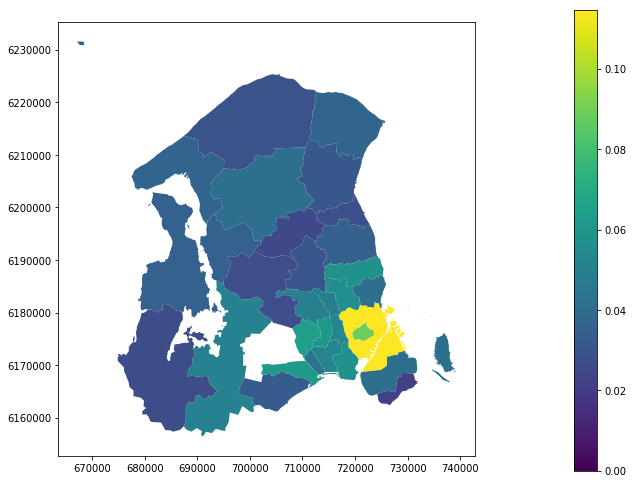

In [11]:
f_cph_young_share_mun

## Static plots (4)

What should be very careful about when making plots?

Never plot sum or count !!! We mix in population density.

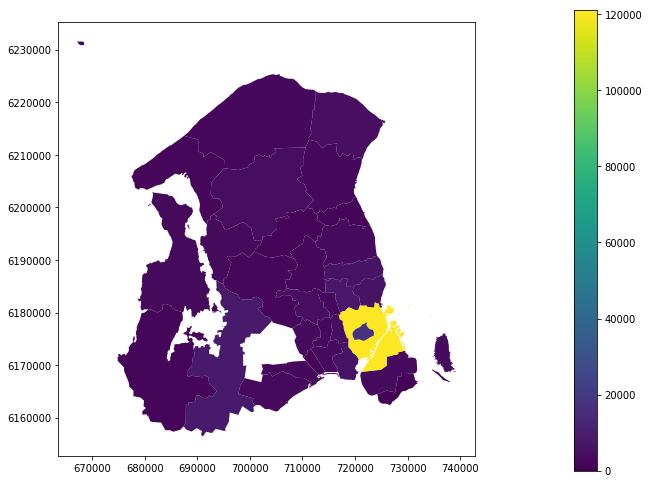

In [12]:
f_cph_young_count_mun

## Folium: Plots with interaction

Make a map of many points for Danish supermarkets.

In [13]:
m_dk_supermarket

# Spatial operations 


## Spatial operations 

When having two or more spatial objects it is possible to make interactions between them.

Basic operations

- Shortest distance between shapes (e.g. Euclidian distance between two points)
    - What about in spherical coordinates? (using Haversine formula is one solution)

## Spatial operations (2)

Advanced operations

- Set like operations ~ make new shapes:
    - Intersection (A and B)
    - Union (A or B)    
    - Difference (A not B)
- We can ask whether two shapes 
    - Intersect or not
    - Touch or not

## Spatial operations (3)

Basic 'set-like' operations in `shapely`.

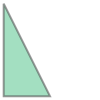

In [80]:
rect_coords = [[0, 0], [0, 2], [1, 2], [1, 0]]

A = Polygon(line_coords)
B = Polygon(rect_coords)



#A | B # union
#A & B # intersection
A - B # set difference

## Spatial operations (4)
 
Example of spatial join through intersection with `GeoPandas`' `sjoin`.

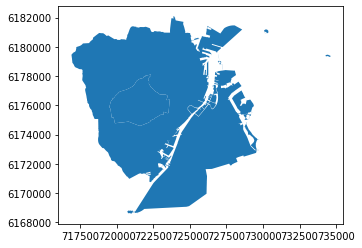

In [75]:
kommuner_cph.plot()

In [81]:
supermarket_cph = gpd.sjoin(gdf_supermarket, kommuner_cph)

## Spatial operations (5)

Check output of spatial join

In [82]:
centroid = supermarket_cph.centroid.to_crs(epsg=4326)
for lat,lon in zip(centroid.y, centroid.x):
    marker_cluster_cph.add_child(folium.Marker(location=[lat, lon]))
marker_cluster_cph.add_to(m_dk_supermarket_cph)
m_dk_supermarket_cph

# Spatial interpolation

## Why spatial interpolation? 

Let's plot 2012 house sale prices. 
- We notice some rural regions have little coverage 

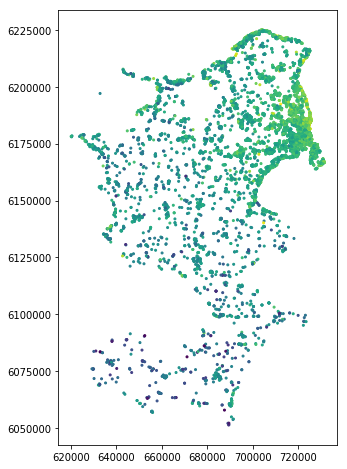

In [19]:
f_price_pointcloud

## Why spatial interpolation? (2)

- Often we are interested in 
    - Look up local weather
    - Data for neighborhoods not just points
    - Having measure available everywhere

- Spatial data is often sparse and pointwise    
    - What about areas in between?
    - Which points to use?

## What is spatial interpolation? 

What is the simplest possible spatial interpolation pattern?

- Kernel regression methods
  - The nearest neighbor
  - Radius neighbor


## What is spatial interpolation? (2)

The nearest neighbor plot is known a the Voronoi plot

Let's see what a Voronoi plot looks like

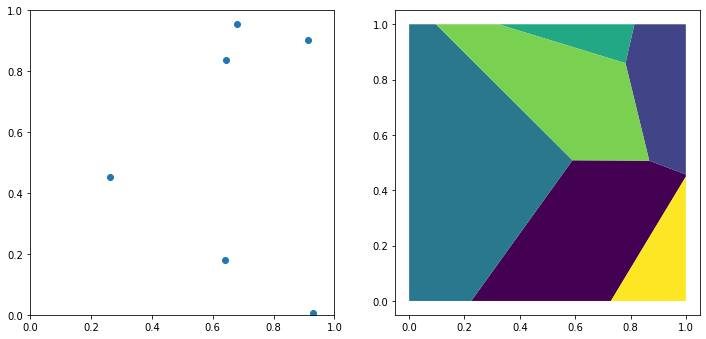

In [85]:
make_vor_plot()

## What is spatial interpolation? (3)

The Voronoi plot for Danish house sale prices in 2012:


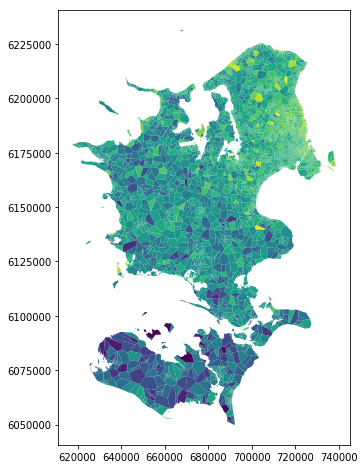

In [21]:
f_price_voronoi

## What is spatial interpolation? (4)

The nearest neighbor method (exercise)

- Find the k nearest points
    - Regression: Take mean of k-nearest
    - Classification: Take mode of k-nearest
    - Can use Euclidian metric 

- The measurement space can be physical e.g. surface distance i 2d 


# Boundary Discontinuity Design



## Regression discontinuity design

Pioneered by [Thistlewaite,  Campbell (1960)](https://doi.org/10.1037/h0044319). Fundmental idea:

- there is some measurable characteristics $x$ 
- exist rhreshold $t$ where $x>t$ implies treatment, otherwise not.
- we can compare groups around $t$:
    - just above is treatment group
    - just below is control group

## Spatial discontinuities

[Black (1999)](https://doi.org/10.1162/003355399556070) argues that administrative boundaries can be used as regression discontinuity
- Municipal borders affect residents which implies differences in taxes, services etc.
- School districts affect school guarantees.
    - Black  finds strong effect on house prices from schools.
- Idea: unobserved selection is removed.

## School districts in Copenhagen

We can repeat the analysis with data from Copenhagen (exercises).

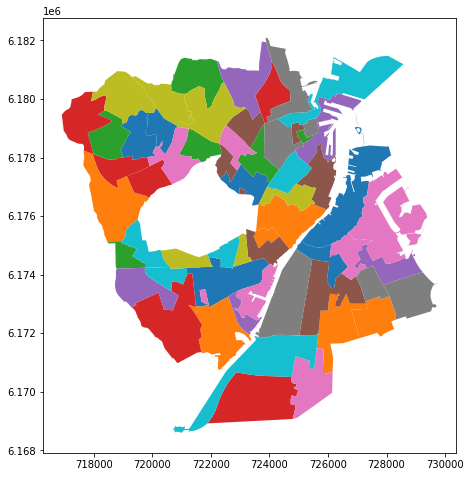

In [2]:
gdf.plot(column='enhedsnavn', figsize = (8,8))

## School districts in Nørrebro

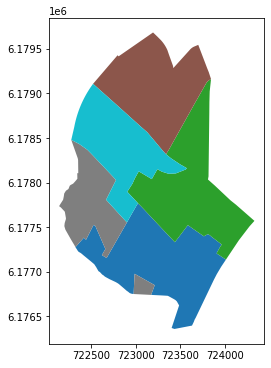

In [5]:
gdf_in = gdf_school[gdf_school.bydelsnavn=='Nørrebro']
gdf_in.plot(column='enhedsnavn', figsize = (6,6))

## School district boundaries 


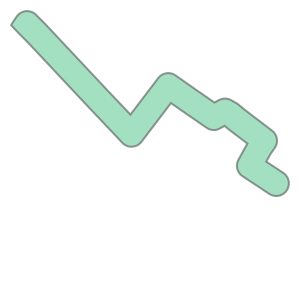

In [11]:
border_dist_m = 50
buffers = gdf_in.geometry.buffer(border_dist_m)
buffers.iloc[0].intersection(buffers.iloc[1])

## School districts impact on house prices

School boundary distance and house prices in Denmark

<center>
<img src="plots/BDD_frStata_ses_big-1.jpg" alt="school boundary house prices" width="650"> 
</center>

## School districts impact on enrollement

[Bjerre-Nielsen, Gandil (2018)](https://www.dropbox.com/s/1buc3mnz9dot8zt/OptingOutOfPublicSchools.pdf?dl=0) analyzes local school avoidance across school boundaries
<center>
<img src="plots/BDD_gridtile_opt_out_pca1_mix_rank-1.jpg" alt="school boundary enrollment" width="600"> 
</center>

## School districts impact on enrollement

School boundary distance and breakdown of local school avoidance

<table>
    <tr>
        <td>
            <center>  <font size="3">Moving district</font>  </center>
            <img src="plots/BDD_gridtile_flytte_dist_5_pca1_mix_rank-1.jpg" alt="school boundary house prices" width="400"> 
        </td>
        <td>
            <center> <font size="3">Other public school</font> </center>
            <img src="plots/BDD_gridtile_other_pub_pca1_mix_rank-1.jpg" alt="school boundary house prices" width="400"> 
        </td>
        <td>
            <center> <font size="3"> Private school</font>  </center>
            <img src="plots/BDD_gridtile_privat_pca1_mix_rank-1.jpg" alt="school boundary house prices" width="400"> 
        </td>        
    </tr>
</table>




## Newer studies



- [Gibbons et al. (2013)](https://doi.org/10.1016/j.jue.2012.11.001) uses a matching approach and compare with similar houses across borders. Smart robusness:
    - control local spatial price trends within borders 
    - removes border on large roads 
- [Fack, Grenet (2010)](https://doi.org/10.1016/j.jpubeco.2009.10.009) shows that the local availability of private schools decreases effects of school districts on house prices

## Closing thoughts

- Remaining threats
    - are neighorhood controls bad?
        - these are co-determined by school districts
    - is there a discontinuity? risk of redrawing boundaries is larger near boundary
    - selection (unobservable differences)
- Proposed mechanism: school reputation
    - [Figlio, Lucas (2004)](https://doi.org/10.1257/0002828041464489) show that differences across school districts are driven by long term changes in school grades
    - [Fiva, Kirkebøen (2011)](https://doi.org/10.1111/j.1467-9442.2011.01651.x) exploits a natural change in information availability and find evidence of supply of information on price differences

# Quasi experiments
***Events with a spatial component***

## Weather effects

Since early studies on weather economists have loved it, why?

- Weather is exogenous and there is LOTS of data.
- National Oceanic and Atmospheric Administration provides global weather data

So what has been studied? Some macro effects:
- human conflicts [Hsiang et al. (2013)](http://science.sciencemag.org/content/341/6151/1235367)
- economic growth [Miguel et al. (2004)](https://doi.org/10.1086/421174)
- see literature review by [Dell et al. (2014)](https://doi.org/10.3386/w19578)

## Exploiting sunset variation
Establishing whether there is discrimination in police stops has been hard. What could be used?

After sunset discrimination is harder. [Pierson et al. (2019)](https://5harad.com/papers/100M-stops.pdf) uses variation in sunset times as a regression discontinuity (combines temporal and spatial knowledge!).  

<center>
    <img src="plots/sunset_variation.PNG" alt="sunset variation discrimination" width="1200"> 
</center>


## Changes to administrative boundaries

[Bjerre-Nielsen, Gandil (2018)](https://www.dropbox.com/s/1buc3mnz9dot8zt/OptingOutOfPublicSchools.pdf?dl=0) address the selection issue by using changes in school boundaries. Avoidance of new local school:

<center>
    <img src="plots/DID_l_yarriv_pca1_mix_rank_01-1.jpg" alt="local school avoidance - DiD" width="700"> 
</center>




## Other examples

- Changes to infrastructure (metro, highways etc.)
- Changes to use of buildings and new construction
- Large scale urban investment (e.g. urban renewal)

# Spatial econometrics

## A noble goal

The goal of spatial econometrics is to identify spatial externalities. What could go wrong?

The connectivity in space implies that there is an underlying adjacency matrix. 

Example: Frederiksberg road network

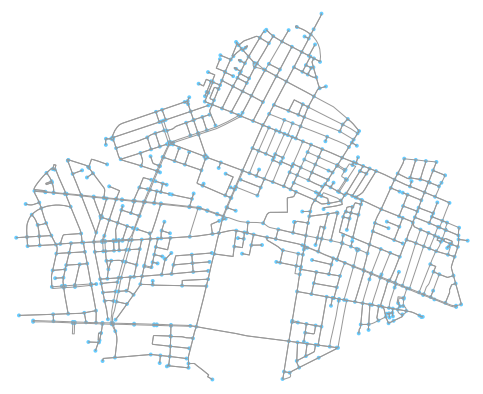

(<Figure size 1102.99x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1388218c438>)

In [10]:
import osmnx as ox
g_frb = ox.graph_from_place('Frederiksberg Kommune, Region Hovedstaden, Denmark', network_type='drive')
ox.plot_graph(g_frb, fig_height=7)

## The consequences

We can represent spatial locations as a network, e.g. within 500m of driving. 
 - [Corrado, Fingleton (2012)](https://doi.org/10.1111/j.1467-9787.2011.00726.x) argues that network identification problems are inherited!

The problems in network identification are the same:
- selection (neighboring municipalities are similar)
- unobservable common shocks
- it is near impossible to isolate endogenous spillovers

Final lecture on peer effects: shows identification is difficult / impossible in networks of spillovers.

## Remedies for spatial econometrics

- Leverage quasi experiments (boundaries, random allocation, timing)
    - Remember careful with structural modelling!
- Structural modelling as in Urban Economics